## Data Cleaning & Exploration

### Steps to take
step 1: Import all the necessary python packages<br>
step 2: Obtain and clean data <br>
step 3: Data Exploration <br>
<font color='grey'>step 4: Modify data for Machine Learning</font><br>
<font color='grey'>step 5: Get dummies</font><br>
<font color='grey'>step 6: SMOTH</font><br>
<font color='grey'>step 5: Split data inot train and test</font><br> 
<font color='grey'>step 6: standard scaling</font><br>
<font color='grey'>step 7: logistic regression</font><br>
<font color='grey'>step 8: parameter tuning</font><br>
<font color='grey'>step 9: provide actionable recommendations</font><br>



# Predicting Successful Bank Phone Campaign 

### Mod 3 Project for FIS DC DS 08262019

### Collaborators:
- **Sisay Filate**
- **Anastasia Kharina**
  

### Goals:

Predicts the outcome of a direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a cash investment for an agreed rate of interest over a fixed amount of time, or term. <br>
<br>
To achieve this goal, we perform logistic regression. Logistic Regression is a predictive Machine Learning classification algorithm that explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.<br>


### Data Source

We used [Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) from UCI Machine Learning Repository




## Step 1: Import all the necessory python packages

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns 
# sns.set(style='white')
# sns.set(style='whitegrid', color_codes=True)

#Machine Learning Modules
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix#, classifiction_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ignore warnings
import warnings; warnings.simplefilter('ignore')

# autoreload 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 2: Obtain and clean data

In [2]:
bank = pd.read_csv('data/bank-additional-full.csv', sep=';')

print(f"The dataset contains {bank.shape[0]} records and {bank.shape[1]} features.")
print(f"There are {bank.isna().sum().sum()} null values in the dataset")

# bank.head()
bank.columns

The dataset contains 41188 records and 21 features.
There are 0 null values in the dataset


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

##### Cleaning data:
- Remove duplicates
- Reclassify "education" from 8 into 5 tiers
- Adding "season" feature
- Select only interesting features
- Add "data/clean_data.csv" file

In [6]:
import data_cleaning 
bank_clean = data_cleaning.cleaned_data(bank)
print(f"The dataset contains {bank_clean.shape[0]} records and {bank_clean.shape[1]} features.")
bank_clean.head()

There were 12 duplicates and they have been removed
The dataset contains 41176 records and 15 features.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,target
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,1,0,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,0,nonexistent,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,1,0,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,0,nonexistent,0


### Input variables explanation (from [source](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing))
1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
6. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
7. contact: contact communication type (categorical: “cellular”, “telephone”)
8. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
9. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
10. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
11. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
12. previous: number of contacts performed before this campaign and for this client (numeric)
13. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

#### Predict variable (desired target):
target — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)


## Step 3: Data exploration

0    0.887337
1    0.112663
Name: target, dtype: float64


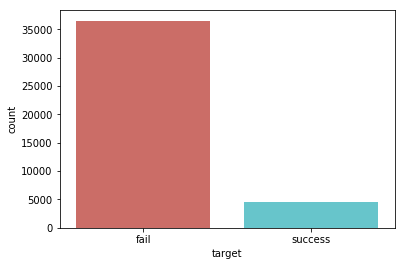

In [7]:
print(bank_clean['target'].value_counts(normalize=True))

c = sns.countplot(x='target', data=bank_clean, palette='hls')
c.set_xticklabels(['fail','success']);

plt.savefig('img/count_plot')

It appears that we have imbalanced classes. Percentage of non subscription is at 89% while percentage of subscription is only 11%. We will keep this in mind as we perform our analysis and make sure we address the problem. 

Text(0, 0.5, 'Frequency of Purchase')

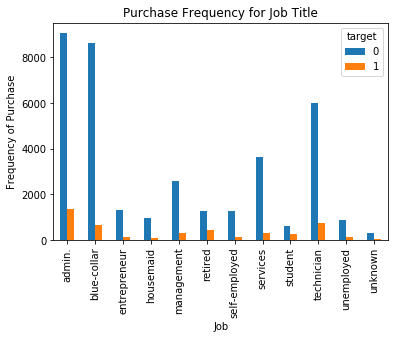

In [8]:
%matplotlib inline
pd.crosstab(bank_clean.job,bank_clean.target).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
# plt.savefig('img/purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

what about marital status?

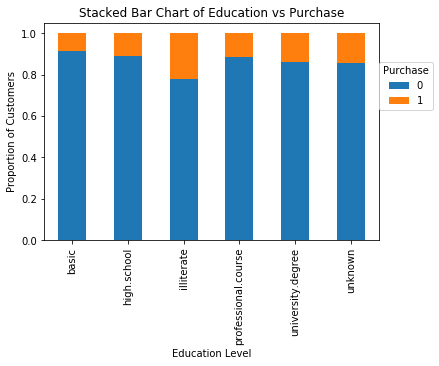

In [10]:
table=pd.crosstab(bank_clean.education,bank_clean.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Customers')
plt.legend(title='Purchase', loc=(1,0.6))
# plt.savefig('mariral_vs_pur_stack')

Education seems to be a good predictor of the outcome variable.

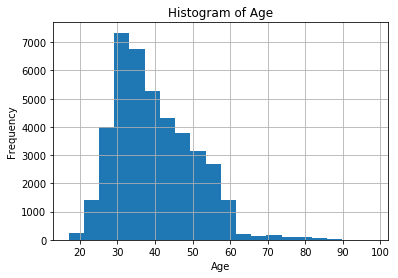

In [11]:
# age distribution
bank_clean.age.hist(bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency');
# plt.savefig('hist_age')

Most customers in this dataset are between 30 to 40 years old.

## Step 4: Get_ dummies

In [12]:
bank_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,target
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,1,0,0,nonexistent,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,0,nonexistent,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,0,nonexistent,0
3,40,admin.,married,basic,no,no,no,telephone,may,mon,1,0,0,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,0,nonexistent,0


In [13]:
X = bank_clean.drop('target', axis = 1)
y = bank_clean['target']
X_dum = pd.get_dummies(X, 
               columns = ['job', 'marital', 'education', 'housing', 'default', 'loan', 'contact', 'month', 'day_of_week','poutcome'], 
               drop_first= True)
print(X_dum.shape)
print(X_dum.columns)
X_dum.head()

(41176, 45)
Index(['age', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_unknown', 'housing_yes',
       'default_unknown', 'default_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


,age,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


## Step 5: Train-test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state = 0, stratify = y, test_size = .2)
print('Train and test datas are split at 80% to 20% ')

Train and test datas are split at 80% to 20% 


In [15]:
print(X_train.shape)
print(y_train.shape)

(32940, 45)
(32940,)


In [17]:
#Save train - test data into csv files
Train = pd.concat([X_train, y_train], axis=1)
Train.to_csv('data/Train.csv',index=False)

Test = pd.concat([X_test, y_test], axis=1)
Test.to_csv('data/Test.csv',index=False)